In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("new data.csv")
data.head()

,Year Type,Year,Organization Group Code,Salaries,Total Benefits
0,Fiscal,2016,1,114473.16,43463.49
1,Calendar,2013,5,84077.11,35976.94
2,Calendar,2015,4,9980.17,3090.04
3,Fiscal,2015,4,2873.41,845.09
4,Fiscal,2014,5,6701.85,3250.09


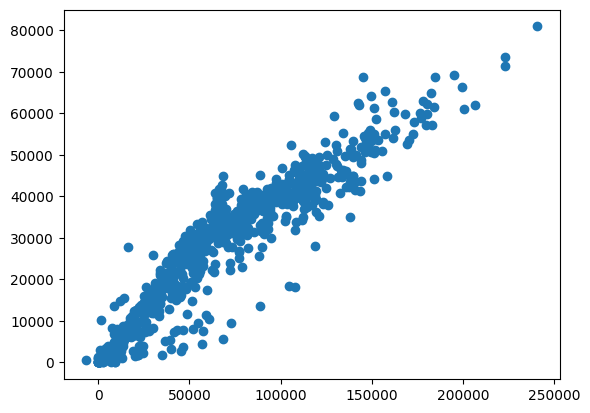

In [ ]:
x_1 = data.iloc[:,3].values
x_2 = data.iloc[:,4].values

plt.scatter(x_1, x_2)
plt.show()

In [ ]:
x_1 = np.array(x_1)
x_2 = np.array(x_2)

print(x_1)

In [ ]:
x_1train, x_1test, x_2train, x_2test = train_test_split(x_1, x_2, test_size=0.2)

print(x_1train)

In [ ]:

#sc = MinMaxScaler()
#x_1train = sc.fit_transform(x_1train.reshape(-1,1))
#x_2train = sc.fit_transform(x_2train.reshape(-1,1))
#x_2test = sc.fit_transform(x_2test.reshape(-1,1))
#x_1test = sc.fit_transform(x_1test.reshape(-1,1))


In [ ]:
def closest_centroids(x_1, x_2, centroids):
 
    K = centroids.shape[0]
    id = np.zeros(x_1.shape[0], dtype=int)

    for i in range(x_1.shape[0]):
        min_value = []
       
        for j in range(K):
            dist =((x_1[i]-centroids[j][0])**2 + (x_2[i]-centroids[j][1])**2)        
            min_value= np.append(min_value, dist)
            min_value = np.array(min_value,dtype=int)
        
        id[i] = np.argmin(min_value)
    
    return id

In [ ]:
def compute_centroids(X, id, K):

    m, n = X.shape

    centroids = np.zeros((K, n))

    
    for i in range(K):
            sum = np.zeros((1,K))
            number = 0
            for j in range(id.shape[0]):
                if(id[j]==i):
                    sum = sum + X[j] 
                    number = number + 1
            
        
            sum = sum/number
            centroids[i] = sum
   
    return centroids


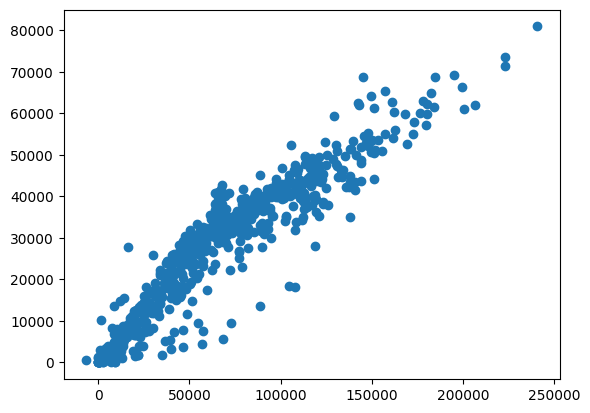

In [ ]:
plt.scatter(x_1train, x_2train)
plt.show()

In [ ]:
centroid = np.array([[10000,10000],[150000,50000]]) 

In [ ]:
for i in range(100):
  id = closest_centroids(x_1train, x_2train, centroid)
  centroid = compute_centroids(np.concatenate((x_1train.reshape(-1,1),x_2train.reshape(-1,1)),axis=1),id,2)


In [ ]:
print(centroid)

[[ 27980.11628641  13425.03723301]
 [101646.85395349  40485.71537468]]
